In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install sympy

In [3]:
m = 10; # MASA (kg)
k = 10000; # TOGOST N/m

In [4]:
#create matrix 3 by 3 with zeores
M = np.zeros((3,3))
#ad values m1, m2 and m3 to diagonal
M[0,0] = m
M[1,1] = 2*m
M[2,2] =5 * m

K = np.zeros((3,3))

k1 = 2*k
k2 = k
k3 = 3*k

K[0,0] = k1 + k2
K[1,1] = k2 + k3
K[2,2] = k3
K[0, 1] = -k2
K[1, 0] = -k2
K[1, 2] = -k3
K[2, 1] = -k3

print(M)
print(K)

[[10.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0. 50.]]
[[ 30000. -10000.      0.]
 [-10000.  40000. -30000.]
 [     0. -30000.  30000.]]


In [5]:
#define matrix A equals to M^-1 * K
A = np.linalg.inv(M) @ K


#find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
#eigenvalues in radians per second
eigenvalues = np.sqrt(eigenvalues)
print("eigenvalues")
print(eigenvalues)
print(" ")
print("eigenvectors")
print(eigenvectors)
print(" ")
#normalize eigenvectors so the second row is 1
eigenvectors = eigenvectors / eigenvectors[1,:]
print(" ")
print("normalised eigenvectors")
print(eigenvectors)
print(" ")
print("A")
print(A)

eigenvalues
[58.68229239 45.52263812  9.16940451]
 
eigenvectors
[[-0.91076631 -0.70648308  0.21820598]
 [ 0.40402635 -0.65539688  0.63627162]
 [-0.08524927  0.26708911  0.73996255]]
 
 
normalised eigenvectors
[[-2.254225    1.07794697  0.3429447 ]
 [ 1.          1.          1.        ]
 [-0.21099929 -0.40752271  1.16296645]]
 
A
[[ 3000. -1000.     0.]
 [ -500.  2000. -1500.]
 [    0.  -600.   600.]]


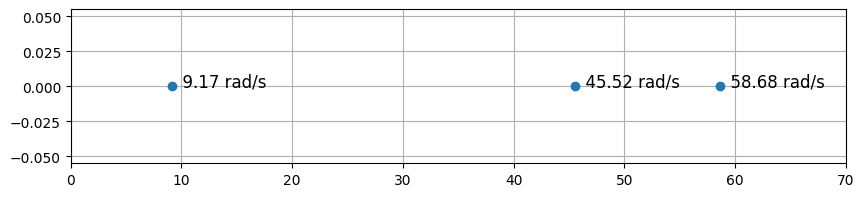

omega1 = 9.17 rad/s
omega2 = 45.52 rad/s
omega3 = 58.68 rad/s


In [58]:
#plot eigenvalues on complex plane with grid and written values
#set plot size 10x4
plt.figure(figsize=(10,2))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {eigenvalues[i]:.2f} rad/s ', fontsize=12)
# range of x and y axis
plt.xlim(0, 70)

plt.show()

#define omega 1, 2 and 3 as eigenvalues [-1, -2, -3] (vzamem normalno (od spredaj), da zračuna prav Mi)
omega1 = eigenvalues[-1]
omega2 = eigenvalues[-2]
omega3 = eigenvalues[-3]
#print omega 1, 2 and 3 with 2 decimal places
print(f'omega1 = {omega1:.2f} rad/s')
print(f'omega2 = {omega2:.2f} rad/s')
print(f'omega3 = {omega3:.2f} rad/s')
    

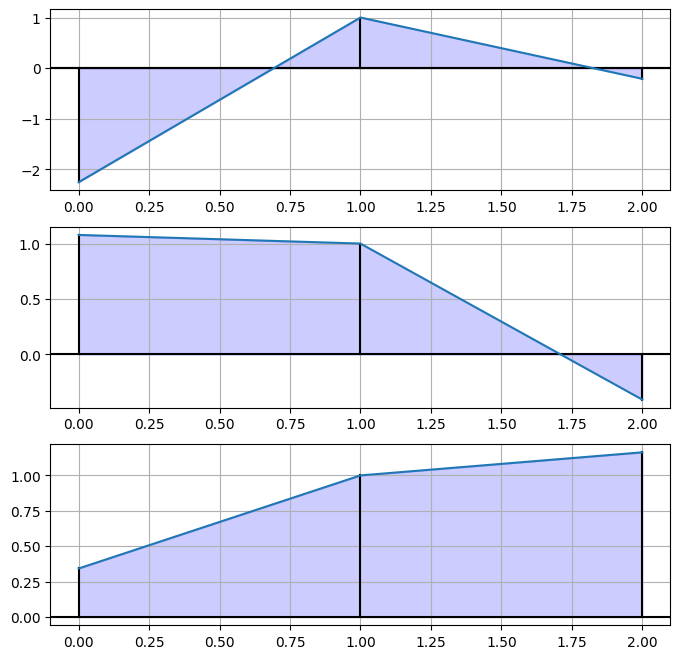

In [7]:
#plot eigenvectors on three plots verticaly with grid
plt.figure(figsize=(8,8))

plt.subplot(3,1,1)
plt.fill_between(np.arange(0,3), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.plot([2,2], [0, eigenvectors[2,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,0])

plt.subplot(3,1,2)
plt.fill_between(np.arange(0,3), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
plt.plot([2,2], [0, eigenvectors[2,1]], 'black')
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])

plt.subplot(3,1,3)
plt.fill_between(np.arange(0,3), eigenvectors[:,2], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,2]], 'black')
plt.plot([1,1], [0, eigenvectors[1,2]], 'black')
plt.plot([2,2], [0, eigenvectors[2,2]], 'black')
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,2])
plt.show()



In [8]:
a = k/m
#calculate I1 = sum of diagonal elements of A
I1 = np.sum(np.diag(A))
#I2 
# I2 = 1/2 * (np.trace(A**2))
I2 = 7.6 * a**2
# I2 = np.sum(np.diag(A))
# I3 = determinant of A
I3 = np.linalg.det(A)

print(f'I1 = {I1/a:.2f} * a')
print(f'I2 = {I2/(a*a):.2f} * a2')
print(f'I3 = {I3/(a*a*a):.2f} * a3')


#define lambda 1, lambda 2 and lambda 3
lambda1 = omega1**2
lambda2 = omega2**2
lambda3 = omega3**2


I1 = 5.60 * a
I2 = 7.60 * a2
I3 = 0.60 * a3


In [9]:
z1 = lambda1/a
z2 = lambda2/a
z3 = lambda3/a

In [10]:
#calculate modal mass as eigenvector transpose * M * eigenvector and modal stiffness as eigenvector transpose * K * eigenvector
modal_mass = np.zeros((3,3))
modal_stiffness = np.zeros((3,3))
#add values to modal mass and modal stiffness
for i in range(3):
    modal_mass[i,i] = eigenvectors[:,i].T @ M @ eigenvectors[:,i]
    modal_stiffness[i,i] = eigenvectors[:,i].T @ K @ eigenvectors[:,i]

# print(f'{modal_mass/m}')
# print(modal_stiffness/k)

print(f'M1 = {modal_mass[-1,-1]/m:.4f} m')
print(f'M2 = {modal_mass[-2,-2]/m:.4f} m')
print(f'M3 = {modal_mass[-3,-3]/m:.4f} m')
print(" ")
print(f'K1 = {modal_stiffness[-1,-1]/k:.4f} k')
print(f'K2 = {modal_stiffness[-2,-2]/k:.4f} k')
print(f'K3 = {modal_stiffness[-3,-3]/k:.3f} k')

M1 = 8.8801 m
M2 = 3.9923 m
M3 = 7.3041 m
 
K1 = 0.7466 k
K2 = 8.2734 k
K3 = 25.1526 k


modal_stiffnes = modal_stiffnes_matrix

## Modal Mass Martix

In [11]:
#define modal matrix
modal_mass_matrix = np.zeros((3,3))
#add values to modal matrix
for i in range(3):
    modal_mass_matrix[i,i] = eigenvectors[:,i].T @ M @ eigenvectors[:,i]
print(modal_mass_matrix)

[[73.04133876  0.          0.        ]
 [ 0.         39.92343476  0.        ]
 [ 0.          0.         88.80065858]]


## Modal Stiffness Martix

In [12]:
#define matrix o modal stiffness
modal_stiffness_matrix = np.zeros((3,3))
#add values to modal stiffness matrix
for i in range(3):
    modal_stiffness_matrix[i,i] = eigenvectors[:,i].T @ K @ eigenvectors[:,i]
print(modal_stiffness_matrix)


[[251525.98973535      0.              0.        ]
 [     0.          82733.75628175      0.        ]
 [     0.              0.           7466.17990883]]


In [59]:
#calculate omega 1 from modal mass and modal stiffness
omega1 = np.sqrt(modal_stiffness_matrix[-1,-1]/modal_mass_matrix[-1,-1])
omega2 = np.sqrt(modal_stiffness_matrix[-2,-2]/modal_mass_matrix[-2,-2])
omega3 = np.sqrt(modal_stiffness_matrix[-3,-3]/modal_mass_matrix[-3,-3])

print(f'modal stiffness 1 = {modal_stiffness_matrix[-1,-1]/k:.3f} * 10**4 N/m')
print(f'modal mass 1 = {modal_mass_matrix[-1,-1]/m:.2f} * 10kg')
print(f'omega1 = {omega1:.2f} rad/s')
print(f'omega1 = {omega1/2/np.pi:.2f} Hz')
print(" ")
print(f'omega2 = {omega2:.2f} rad/s')
print(f'omega2 = {omega2/2/np.pi:.2f} Hz')
print(" ")
print(f'omega3 = {omega3:.2f} rad/s')
print(f'omega3 = {omega3/2/np.pi:.2f} Hz')

modal stiffness 1 = 0.747 * 10**4 N/m
modal mass 1 = 8.88 * 10kg
omega1 = 9.17 rad/s
omega1 = 1.46 Hz
 
omega2 = 45.52 rad/s
omega2 = 7.25 Hz
 
omega3 = 58.68 rad/s
omega3 = 9.34 Hz


In [22]:
print("Eigenvectors:")
print(f'{eigenvectors[0, -1]:.3f}')
print(f'{eigenvectors[1, -1]:.3f}')
print(f'{eigenvectors[2, -1]:.3f}')
print("  ")
print(f'{eigenvectors[0, -2]:.3f}')
print(f'{eigenvectors[1, -2]:.3f}')
print(f'{eigenvectors[2, -2]:.3f}')
print("  ")
print(f'{eigenvectors[0, -3]:.3f}')
print(f'{eigenvectors[1, -3]:.3f}')
print(f'{eigenvectors[2, -3]:.3f}')

Eigenvectors:
0.343
1.000
1.163
  
1.078
1.000
-0.408
  
-2.254
1.000
-0.211


In [53]:
#define vectors C and phi
C = np.zeros((3))
phi = np.zeros((3))

C1 = 0.1;
C2 = 0;
C3 = -0.5;

C[0] = C1;
C[1] = C2;
C[2] = C3;

phi1 = 180 * np.pi/180;
phi2 = 0 * np.pi/180;
phi3 = 0 * np.pi/180;

phi[0] = phi1;
phi[1] = phi2;
phi[2] = phi3;
t = np.linspace(0, 20, 200000)

In [54]:
x_1 = eigenvectors[0,-1] * C1 * np.cos(omega1 * t - phi1) + eigenvectors[0,-2] * C2 * np.cos(omega2 * t - phi2) + eigenvectors[0, -3] * C3 * np.cos(omega3 * t - phi3)
x_2 = eigenvectors[1, -1] * C1 * np.sin(omega1 * t - phi1) + eigenvectors[1, -2] * C2 * np.sin(omega2 * t - phi2) + eigenvectors[1,-3] * C3 * np.sin(omega3 * t - phi3)
x_3 = eigenvectors[2, -1] * C1 * np.sin(omega1 * t - phi1) + eigenvectors[2, -2] * C2 * np.sin(omega2 * t - phi2) + eigenvectors[2,-3] * C3 * np.sin(omega3 * t - phi3)

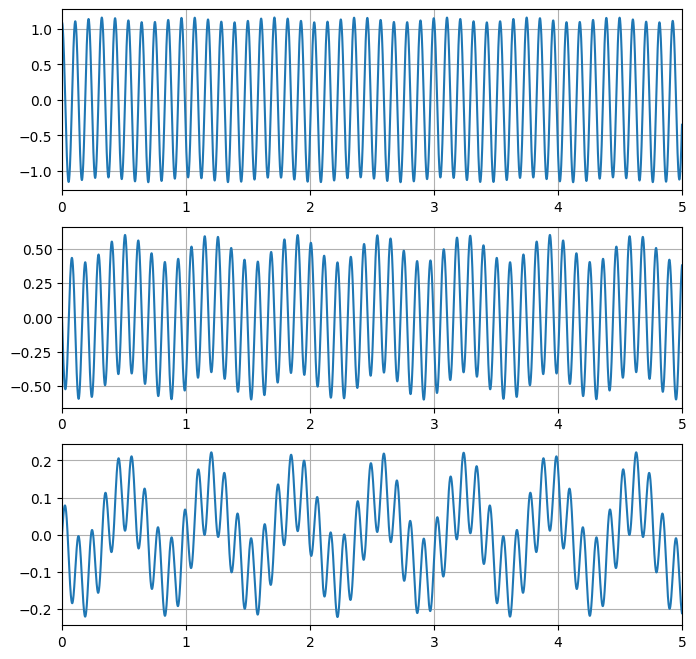

In [55]:
#plot x_1, x_2 and x_3 verticaly on three plots
plt.figure(figsize=(8,8))
#range axis 
plt.subplot(3,1,1)
plt.xlim(0, 5)
plt.plot(t, x_1)
plt.grid()
plt.subplot(3,1,2)
plt.xlim(0, 5)
plt.plot(t, x_2)
plt.grid()
plt.subplot(3,1,3)
plt.xlim(0, 5)
plt.plot(t, x_3)
plt.grid()



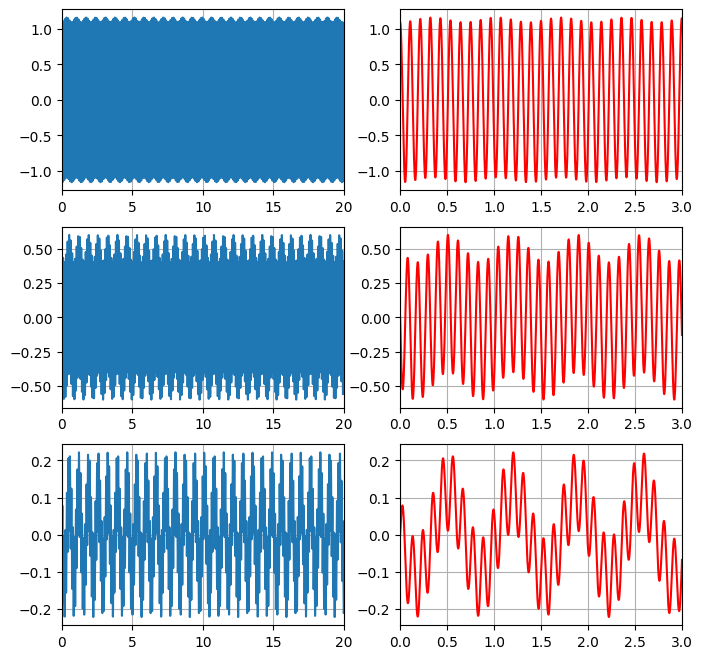

In [56]:
#create 6 plots in two columns
#fist colimn x range 0, 5
#second column x range 0, 20

plt.figure(figsize=(8,8))
#range axis
plt.subplot(3,2,1)
plt.xlim(0, 20)
plt.plot(t, x_1)
plt.grid()
plt.subplot(3,2,2)
plt.xlim(0, 3)
plt.plot(t, x_1, color='red')
plt.grid()  
plt.subplot(3,2,3)
plt.xlim(0, 20)
plt.plot(t, x_2)
plt.grid()
plt.subplot(3,2,4)
plt.xlim(0, 3)
plt.plot(t, x_2, color='red')
plt.grid()
plt.subplot(3,2,5)
plt.xlim(0, 20)
plt.plot(t, x_3)
plt.grid()
plt.subplot(3,2,6)
plt.xlim(0, 3)
plt.plot(t, x_3, color='red')
plt.grid()
